This script is intended to clean the data of the Mexican social indicators.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import math Library
import math 




In [3]:
%cd 'Documents/GitHub/pmx_gasoline_theft_prediction/'

/Users/jorgeroa/Documents/GitHub/pmx_gasoline_theft_prediction


In [4]:
df_social_2015_ori = pd.read_excel("data-raw/IRS_2015.xlsx")
df_social_2020_ori = pd.read_excel("data-raw/IRS_2020.xlsx")

In [5]:
df_social_2015_ori

df_social_2020_ori[(df_social_2020_ori['IRS'].isna())]



,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS,grade,place


In [6]:
df_social_2020_ori

,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS,grade,place
0,1001,948990,1.642183,4.601069,20.252928,18.250877,0.574092,0.272787,0.371096,0.299428,0.164348,12.125340,4.333453,-1.315320,Muy bajo,2435
1,1002,51536,3.523404,6.294853,33.869504,14.727569,1.469414,3.825268,0.990257,3.569717,0.758665,17.696854,11.587606,-0.857301,Muy bajo,1986
2,1003,58250,4.487288,6.948460,42.424388,20.312446,1.121134,0.715206,0.940722,0.663660,0.721649,12.628866,5.547680,-0.918554,Muy bajo,2076
3,1004,17000,3.139545,5.697637,27.595837,13.805882,1.017553,2.009667,0.788603,1.195625,0.635970,18.519461,10.506233,-1.004023,Muy bajo,2178
4,1005,129929,2.377387,5.877568,26.604873,21.010706,1.239034,0.584848,0.862199,0.780803,0.467276,12.007476,5.296795,-1.173361,Muy bajo,2347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,32054,19446,7.489290,4.534543,36.604957,15.473619,1.414141,4.161616,2.040404,5.919192,0.666667,19.656566,15.878788,-0.692240,Bajo,1768
2465,32055,31558,4.196878,5.288837,44.877591,25.163192,1.073959,3.011515,1.262179,3.974756,0.830381,11.625332,5.580159,-0.884952,Muy bajo,2020
2466,32056,149607,1.437077,3.669372,19.253869,16.944394,0.479090,0.535731,1.106863,0.429529,0.181724,10.738223,4.559615,-1.336926,Muy bajo,2444
2467,32057,20455,5.116885,5.658915,31.989578,13.840137,1.392459,4.584404,3.191945,4.284490,0.578406,20.651243,17.245073,-0.748505,Muy bajo,1841


In [7]:
#create a new dataframe, rename and drop some variables - 2015
df_social_2015 = df_social_2015_ori
#df_social_2015 = df_social_2015_ori.rename(columns = {'CVEGEO' : 'Mun_Code'})
df_social_2015.drop(['place'], axis = 1, inplace = True)
df_social_2015['CVEGEO'] = df_social_2015['CVEGEO'].astype(str).str.zfill(5)

print(df_social_2015.head())

#create a new dataframe, rename and drop some variables - 2015
df_social_2020 = df_social_2020_ori


#df_social_2020 = df_social_2020_ori.rename(columns = {'CVEGEO' : 'Mun_Code'})
df_social_2020.drop(['place'], axis = 1, inplace = True)
df_social_2020['CVEGEO'] = df_social_2020['CVEGEO'].astype(str).str.zfill(5)


df_social_2020.head()

  CVEGEO  POB_TOT   SBASC  POB_6_16_NEB  POB_16_EBI    NO_SS    OVPT  \
0  01001   877190  2.0570        3.4786     25.6873  14.1560  0.5478   
1  01002    46464  4.4207        2.5959     41.8921   5.5355  1.6779   
2  01003    56048  4.7805        4.3906     49.1856   9.7524  1.0577   
3  01004    15577  4.3233        2.6265     33.0597   5.1165  1.5629   
4  01005   120405  3.2445        4.1297     33.7271  13.8341  0.9201   

   NO_SANIT   OVSAE  NO_DREN  NO_ELECT  NO_LAVA  No_REFRI       IRS     grade  
0    0.5543  0.6627   0.4819    0.1999  13.8229    5.4216 -1.365841  Muy bajo  
1    5.6457  1.2979   5.9887    1.1681  23.4356   15.2220 -0.883915      Bajo  
2    0.7756  0.9519   0.8673    0.5429  15.5620    7.3826 -0.979457      Bajo  
3    2.8986  0.5968   1.9324    0.7389  23.0747   12.4467 -1.062688  Muy bajo  
4    1.0273  0.9443   0.7264    0.4220  15.5097    8.1976 -1.188620  Muy bajo  


,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS,grade
0,01001,948990,1.642183,4.601069,20.252928,18.250877,0.574092,0.272787,0.371096,0.299428,0.164348,12.125340,4.333453,-1.315320,Muy bajo
1,01002,51536,3.523404,6.294853,33.869504,14.727569,1.469414,3.825268,0.990257,3.569717,0.758665,17.696854,11.587606,-0.857301,Muy bajo
2,01003,58250,4.487288,6.948460,42.424388,20.312446,1.121134,0.715206,0.940722,0.663660,0.721649,12.628866,5.547680,-0.918554,Muy bajo
3,01004,17000,3.139545,5.697637,27.595837,13.805882,1.017553,2.009667,0.788603,1.195625,0.635970,18.519461,10.506233,-1.004023,Muy bajo
4,01005,129929,2.377387,5.877568,26.604873,21.010706,1.239034,0.584848,0.862199,0.780803,0.467276,12.007476,5.296795,-1.173361,Muy bajo


In [79]:
#Join Databases 2015 and 2020 - TEST THE IF CASE

# df_social_2015_2020_2 = df_social_2020.join(df_social_2015.set_index('Mun_Code'), lsuffix='_S2020', rsuffix='_S2015', on = 'Mun_Code', how = 'left')

# social_indicators = ['ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM', 'IMN']

# # Loop over the joined dataframe to calculate to value to 2019 and the mean between 2015-2019
# for key in social_indicators:
#   if df_social_2015_2020_2[key+'_S2015'].isnull() { 
#       df_social_2015_2020_2[key+'_var_Anual'] = df_social_2015_2020_2[key+'_S2020'] / 5
#       df_social_2015_2020_2[key+'_S2019'] = df_social_2015_2020_2[key+'_var_Anual'] * 4
#       df_social_2015_2020_2[key+'_mean_15_19'] = (df_social_2015_2020_2[key+'_S2019']) /2
     
#   } else {
#       df_social_2015_2020_2[key+'_var_Anual'] = (df_social_2015_2020_2[key+'_S2020'].div(df_social_2015_2020_2[key+'_S2015'].values))**(1/5)
#       df_social_2015_2020_2[key+'_S2019'] = (df_social_2015_2020_2[key+'_S2015'] * ((df_social_2015_2020_2[key+'_var_Anual'])**4))
#       df_social_2015_2020_2[key+'_mean_15_19'] = (df_social_2015_2020_2[key+'_S2015'] + df_social_2015_2020_2[key+'_S2019']) /2
#   }
 
# # Generate a mean dataframe and rename the variables
# df_social_mean_2015_2019_2 = df_social_2015_2020_2[df_social_2015_2020_2.columns[df_social_2015_2020_2.columns.str.contains("_mean_15_19|Mun_Code")]]
# df_social_mean_2015_2019_2 = df_social_mean_2015_2019_2.rename(columns = {'ANALF_mean_15_19' : 'ANALF', 'SBASC_mean_15_19' : 'SBASC', 'OVSDE_mean_15_19' : 'OVSDE', 'OVSEE_mean_15_19' : 'OVSEE', 'OVSAE_mean_15_19' : 'OVSAE', 'OVPT_mean_15_19' : 'OVPT', 'VHAC_mean_15_19' : 'VHAC', 'PL.5000_mean_15_19' : 'PL.5000', 'PO2SM_mean_15_19' : 'PO2SM', 'IMN_mean_15_19' : 'IMN'})
# df_social_mean_2015_2019_2



In [9]:
#Join Databases 2015 and 2020

df_social_2015_2020 = df_social_2015.join(df_social_2020.set_index('CVEGEO'), lsuffix='_S2015', rsuffix='_S2020', on = 'CVEGEO', how = 'outer')

social_indicators = ["POB_TOT", "SBASC", "POB_6_16_NEB", "POB_16_EBI", "NO_SS", "OVPT", "NO_SANIT", "OVSAE", "NO_DREN", "NO_ELECT", "NO_LAVA", "No_REFRI", "IRS"]

# Loop over the joined dataframe to calculate to value to 2019 and the mean between 2015-2019
for key in social_indicators: 
      df_social_2015_2020[key+'_var_Anual'] = (df_social_2015_2020[key+'_S2020']/df_social_2015_2020[key+'_S2015'])**(1/5)
      df_social_2015_2020[key+'_S2019'] = (df_social_2015_2020[key+'_S2015'] * ((df_social_2015_2020[key+'_var_Anual'])**4))
      df_social_2015_2020[key+'_mean_15_19'] = (df_social_2015_2020[key+'_S2015'] + df_social_2015_2020[key+'_S2019']) /2
      df_social_2015_2020[key+'_mean_15_20'] = (df_social_2015_2020[key+'_S2015'] + df_social_2015_2020[key+'_S2020']) /2


df_social_2015_2020['IRS_mean_15_19'] = np.where(df_social_2015_2020['IRS_mean_15_19'].isna(), df_social_2015_2020['IRS_mean_15_20'], df_social_2015_2020['IRS_mean_15_19'])
# Generate a mean dataframe and rename the variables
#df_social_mean_2015_2019 = df_social_2015_2020[df_social_2015_2020.columns[df_social_2015_2020.columns.str.contains("_mean_15_19|CVEGEO")]]

#df_social_mean_2015_2019.columns = df_social_mean_2015_2019.columns.str.replace("_mean_15_19", "", regex=True)

#df_social_mean_2015_2019["POB_TOT"] = df_social_mean_2015_2019["POB_TOT"].round()


In [16]:
df_social_2015_2020
 
df_social_2019 = df_social_2015_2020[df_social_2015_2020.columns[df_social_2015_2020.columns.str.contains("_S2019|CVEGEO")]]

df_social_2019.columns = df_social_2019.columns.str.replace("_S2019", "", regex=True)

df_social_2019["POB_TOT"] = df_social_2019["POB_TOT"].round()

df_social_2019

/var/folders/q3/ztffc4r10tv5h4pftjr2qw0r0000gn/T/ipykernel_74127/2756169778.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social_2019["POB_TOT"] = df_social_2019["POB_TOT"].round()


,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS
0.0,01001,934175.0,1.717845,4.350788,21.238994,17.346629,0.568735,0.314346,0.416728,0.329325,0.170913,12.447295,4.532030,-1.325272
1.0,01002,50479.0,3.686958,5.272858,35.340566,12.109779,1.508928,4.134977,1.045314,3.958891,0.827058,18.719406,12.237405,-0.862559
2.0,01003,57803.0,4.544455,6.338925,43.697849,17.540101,1.108150,0.726896,0.942947,0.700149,0.681718,13.167538,5.873960,-0.930424
3.0,01004,16705.0,3.347006,4.880129,28.611105,11.319987,1.108745,2.162405,0.745852,1.316120,0.655340,19.352180,10.868471,-1.015491
4.0,01005,127966.0,2.529936,5.476989,27.897466,19.326032,1.167437,0.654597,0.878027,0.769606,0.457848,12.638108,5.780267,-1.176397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,20407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,20427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,21138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,23011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
#Check if we have NaN or empty cells

#for key in df_social_2015_2020[["OVSEE_S2015"]]:
#  if (df_social_2015_2020['OVSEE_S2015'].isnull() | df_social_2015_2020['OVSEE_S2015'] == '')

#df_social_2015_2020.loc[(df_social_2015_2020['OVSEE_S2015'].isnull() | df_social_2015_2020['OVSEE_S2015'] == ''), 'OVSEE_mean_15_19'] = df_social_2015_2020['OVSEE_S2020'] / 5 * 4


In [81]:
#df_social_mean_2015_2019.loc[df_social_mean_2015_2019.isnull()]
#df_social_mean_2015_2019.loc[df_social_mean_2015_2019['Mun_Code'] == "02006"].isnull()
#df_social_mean_2015_2019.loc[(df_social_mean_2015_2019['OVSEE'].isnull() | df_social_2015_2020['OVSEE'] == '')]
#print(df_social_mean_2015_2019.loc[(df_social_mean_2015_2019['Mun_Code'] == '02006')])

In [18]:
df_social_2019.dtypes



CVEGEO           object
POB_TOT         float64
SBASC           float64
POB_6_16_NEB    float64
POB_16_EBI      float64
NO_SS           float64
OVPT            float64
NO_SANIT        float64
OVSAE           float64
NO_DREN         float64
NO_ELECT        float64
NO_LAVA         float64
No_REFRI        float64
IRS             float64
dtype: object

In [17]:
df_social_19_NA = df_social_2019[(df_social_2019['POB_TOT'].isna())]

df_social_19_NA_f = df_social_19_NA[["CVEGEO"]]

df_social_2020

df_social_2020_NA = pd.merge(df_social_19_NA_f,
                             df_social_2020,
                             on='CVEGEO',
                             how='left',
                             indicator=True)


In [19]:
df_social_19_not_NA = df_social_2019[(df_social_2019 ['POB_TOT'].notna())]

df_social_19_not_NA

df_social_2019[(df_social_2019['IRS'].isna())]



,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS
80.0,07001,18012.0,10.939244,8.526545,52.712266,29.692887,4.155669,4.228148,7.091522,4.639823,2.026334,57.425328,27.398918,NaN
95.0,07016,17507.0,13.395165,8.504807,49.508453,28.461367,8.679010,5.733604,3.745711,6.284434,2.371794,40.342943,18.139751,NaN
248.0,08054,7749.0,1.919650,27.120444,80.900569,11.783298,0.332904,0.822819,0.322466,1.305607,0.304457,4.779683,1.263226,NaN
300.0,10025,2907.0,5.298957,12.479685,53.695640,11.608867,2.009489,5.601430,2.674361,6.518404,3.242665,28.010992,13.176154,NaN
343.0,11029,40773.0,10.941817,5.401934,51.506803,14.137025,4.646982,14.015760,3.232100,16.937966,1.162129,28.605127,17.346812,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,20407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,20427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,21138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,23011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_social_19_final = df_social_19_not_NA.append(df_social_2020_NA).drop(['grade', "_merge"], axis=1)


df_social_19_final.dtypes

/var/folders/q3/ztffc4r10tv5h4pftjr2qw0r0000gn/T/ipykernel_74127/2023152720.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_social_19_final = df_social_19_not_NA.append(df_social_2020_NA).drop(['grade', "_merge"], axis=1)


CVEGEO           object
POB_TOT         float64
SBASC           float64
POB_6_16_NEB    float64
POB_16_EBI      float64
NO_SS           float64
OVPT            float64
NO_SANIT        float64
OVSAE           float64
NO_DREN         float64
NO_ELECT        float64
NO_LAVA         float64
No_REFRI        float64
IRS             float64
dtype: object

In [22]:
#Export to excel
df_social_19_final['CVEGEO']=df_social_19_final['CVEGEO'].astype(object)

df_social_19_final.dtypes

df_social_19_final.to_excel('data/df_social_19_final_JR.xlsx', index = False)

In [23]:
df_social_19_final

,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS
0.0,01001,934175.0,1.717845,4.350788,21.238994,17.346629,0.568735,0.314346,0.416728,0.329325,0.170913,12.447295,4.532030,-1.325272
1.0,01002,50479.0,3.686958,5.272858,35.340566,12.109779,1.508928,4.134977,1.045314,3.958891,0.827058,18.719406,12.237405,-0.862559
2.0,01003,57803.0,4.544455,6.338925,43.697849,17.540101,1.108150,0.726896,0.942947,0.700149,0.681718,13.167538,5.873960,-0.930424
3.0,01004,16705.0,3.347006,4.880129,28.611105,11.319987,1.108745,2.162405,0.745852,1.316120,0.655340,19.352180,10.868471,-1.015491
4.0,01005,127966.0,2.529936,5.476989,27.897466,19.326032,1.167437,0.654597,0.878027,0.769606,0.457848,12.638108,5.780267,-1.176397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18.0,20407,9578.0,21.538462,9.381373,63.136095,22.238463,11.553030,26.250000,16.439394,13.068182,2.500000,75.037879,51.818182,1.476259
19.0,20427,16706.0,11.211329,4.044118,44.926490,34.706094,4.477310,12.905186,10.514587,2.876823,1.235818,52.856564,28.423825,0.026755
20.0,21138,11780.0,7.239159,4.862475,48.257014,30.050934,9.232523,0.645897,1.291793,0.987842,0.265957,57.218845,48.138298,-0.057591
21.0,23011,26921.0,3.506609,9.605975,23.693036,34.322648,3.203583,1.274544,1.814215,1.825698,1.469744,28.292571,12.802848,-0.879341


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff122cb3a50>,
      dtype=object)

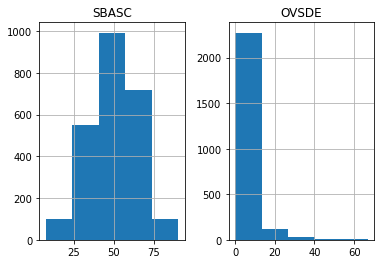

In [56]:
#Check the variables distribution - histogram

#df_social_mean_2015_2019.iloc[:,2:4].hist(bins = 5)

In [115]:
df_social_2015_2020

,CVEGEO,POB_TOT_S2015,SBASC_S2015,POB_6_16_NEB_S2015,POB_16_EBI_S2015,NO_SS_S2015,OVPT_S2015,NO_SANIT_S2015,OVSAE_S2015,NO_DREN_S2015,...,NO_ELECT_mean_15_19,NO_LAVA_var_Anual,NO_LAVA_S2019,NO_LAVA_mean_15_19,No_REFRI_var_Anual,No_REFRI_S2019,No_REFRI_mean_15_19,IRS_var_Anual,IRS_S2019,IRS_mean_15_19
0.0,01001,877190.0,2.0570,3.4786,25.6873,14.1560,0.5478,0.5543,0.6627,0.4819,...,0.185406,0.974135,12.447295,13.135097,0.956184,4.532030,4.976815,0.992490,-1.325272,-1.345557
1.0,01002,46464.0,4.4207,2.5959,41.8921,5.5355,1.6779,5.6457,1.2979,5.9887,...,0.997579,0.945375,18.719406,21.077503,0.946901,12.237405,13.729702,0.993904,-0.862559,-0.873237
2.0,01003,56048.0,4.7805,4.3906,49.1856,9.7524,1.0577,0.7756,0.9519,0.8673,...,0.612309,0.959091,13.167538,14.364769,0.944453,5.873960,6.628280,0.987243,-0.930424,-0.954940
3.0,01004,15577.0,4.3233,2.6265,33.0597,5.1165,1.5629,2.8986,0.5968,1.9324,...,0.697120,0.956970,19.352180,21.213440,0.966671,10.868471,11.657586,0.988707,-1.015491,-1.039090
4.0,01005,120405.0,3.2445,4.1297,33.7271,13.8341,0.9201,1.0273,0.9443,0.7264,...,0.439924,0.950101,12.638108,14.073904,0.916358,5.780267,6.988933,0.997419,-1.176397,-1.182509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,20407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,20427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,21138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,23011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df_social_2015_2020["IRS_var_year"] = (df_social_2015_2020["IRS_S2020"]/df_social_2015_2020["IRS_S2020"])/6

df_social_2015_2020["IRS_2019_final"] = (df_social_2015_2020["IRS_S2015"])+(df_social_2015_2020["IRS_var_year"]*4)

df_social_2015_2020["IRS_2015_2019"] = (df_social_2015_2020["IRS_S2015"])+(df_social_2015_2020["IRS_2019_final"]/2)

In [126]:
df_social_2015_2020_f = df_social_2015_2020[["IRS_2019_final","IRS_S2015","IRS_S2020", "IRS_S2019", "IRS_2015_2019", "IRS_mean_15_19"]]
df_social_2015_2020_f.head(20)

,IRS_2019_final,IRS_S2015,IRS_S2020,IRS_S2019,IRS_2015_2019,IRS_mean_15_19
0.0,-0.699174,-1.365841,-1.315320,NaN,-1.715428,NaN
1.0,-0.217249,-0.883915,-0.857301,NaN,-0.992540,NaN
2.0,-0.312790,-0.979457,-0.918554,NaN,-1.135852,NaN
3.0,-0.396021,-1.062688,-1.004023,NaN,-1.260699,NaN
4.0,-0.521953,-1.188620,-1.173361,NaN,-1.449597,NaN
5.0,-0.530743,-1.197410,-1.168755,NaN,-1.462782,NaN
6.0,-0.465668,-1.132335,-1.065487,NaN,-1.365169,NaN
7.0,-0.324209,-0.990875,-0.956906,NaN,-1.152979,NaN
8.0,-0.290791,-0.957458,-0.900102,NaN,-1.102854,NaN
9.0,-0.109902,-0.776568,-0.829259,NaN,-0.831519,NaN
